In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from PIL import Image as PILImage #Using the "as" for alising due to previous Image import
import requests
from io import BytesIO
from collections import Counter
import ydata_profiling

In [2]:
dataset = pd.read_csv("pokemon.csv")
dataset.head()

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [3]:
# This gives a very small description of the distribution of our dataset
dataset.describe()

,Unnamed: 0,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,596.500000,492.746231,441.206868,70.883585,80.948911,74.587102,72.881072,72.123953,69.782245
std,344.822418,293.719541,121.015326,26.861740,32.126164,30.678626,32.702411,27.628412,30.200828
min,0.000000,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,298.250000,235.250000,330.000000,52.000000,56.000000,51.250000,50.000000,50.000000,45.000000
50%,596.500000,486.500000,460.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,894.750000,741.750000,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.750000
max,1193.000000,1010.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [4]:
# This gives us info about our dataset and can be used to gain more insights
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1194 non-null   int64 
 1   image_url   1194 non-null   object
 2   Id          1194 non-null   int64 
 3   Names       1194 non-null   object
 4   Type1       1194 non-null   object
 5   Type2       652 non-null    object
 6   Total       1194 non-null   int64 
 7   HP          1194 non-null   int64 
 8   Attack      1194 non-null   int64 
 9   Defense     1194 non-null   int64 
 10  Sp. Atk     1194 non-null   int64 
 11  Sp. Def     1194 non-null   int64 
 12  Speed       1194 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 121.4+ KB


We should drop the unnamed column as it is similar to our index

In [5]:
dataset = dataset.drop(columns="Unnamed: 0")

In [6]:
dataset.head()

,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


Checking for the unique pokemon names and getting an idea of how much if each we have in this dataset

In [7]:
dataset.Names.value_counts()

Bulbasaur                 1
Litleo                    1
Spewpa                    1
Scatterbug                1
Talonflame                1
                         ..
Numel                     1
Wailord                   1
Wailmer                   1
Sharpedo Mega Sharpedo    1
Iron Leaves               1
Name: Names, Length: 1194, dtype: int64

We have one pokemon type each for the different pokemons, exactly 1,194 pokemons, which is the same as our dataset

The next is to visualize some of these pokemons, like the first 30 instances in our dataset

However, from checking the images, they seem to be very small, we can go ahead and resize the images using the python's pillow library

In [8]:
# Creating a funtion that resizes the small images
def resize_img(local_url):
    img_resp = requests.get(local_url)
    with PILImage.open(BytesIO(img_resp.content)) as img_to_rez:
        img_to_rez.resize(size=(200, 200))
    return img_to_rez
        

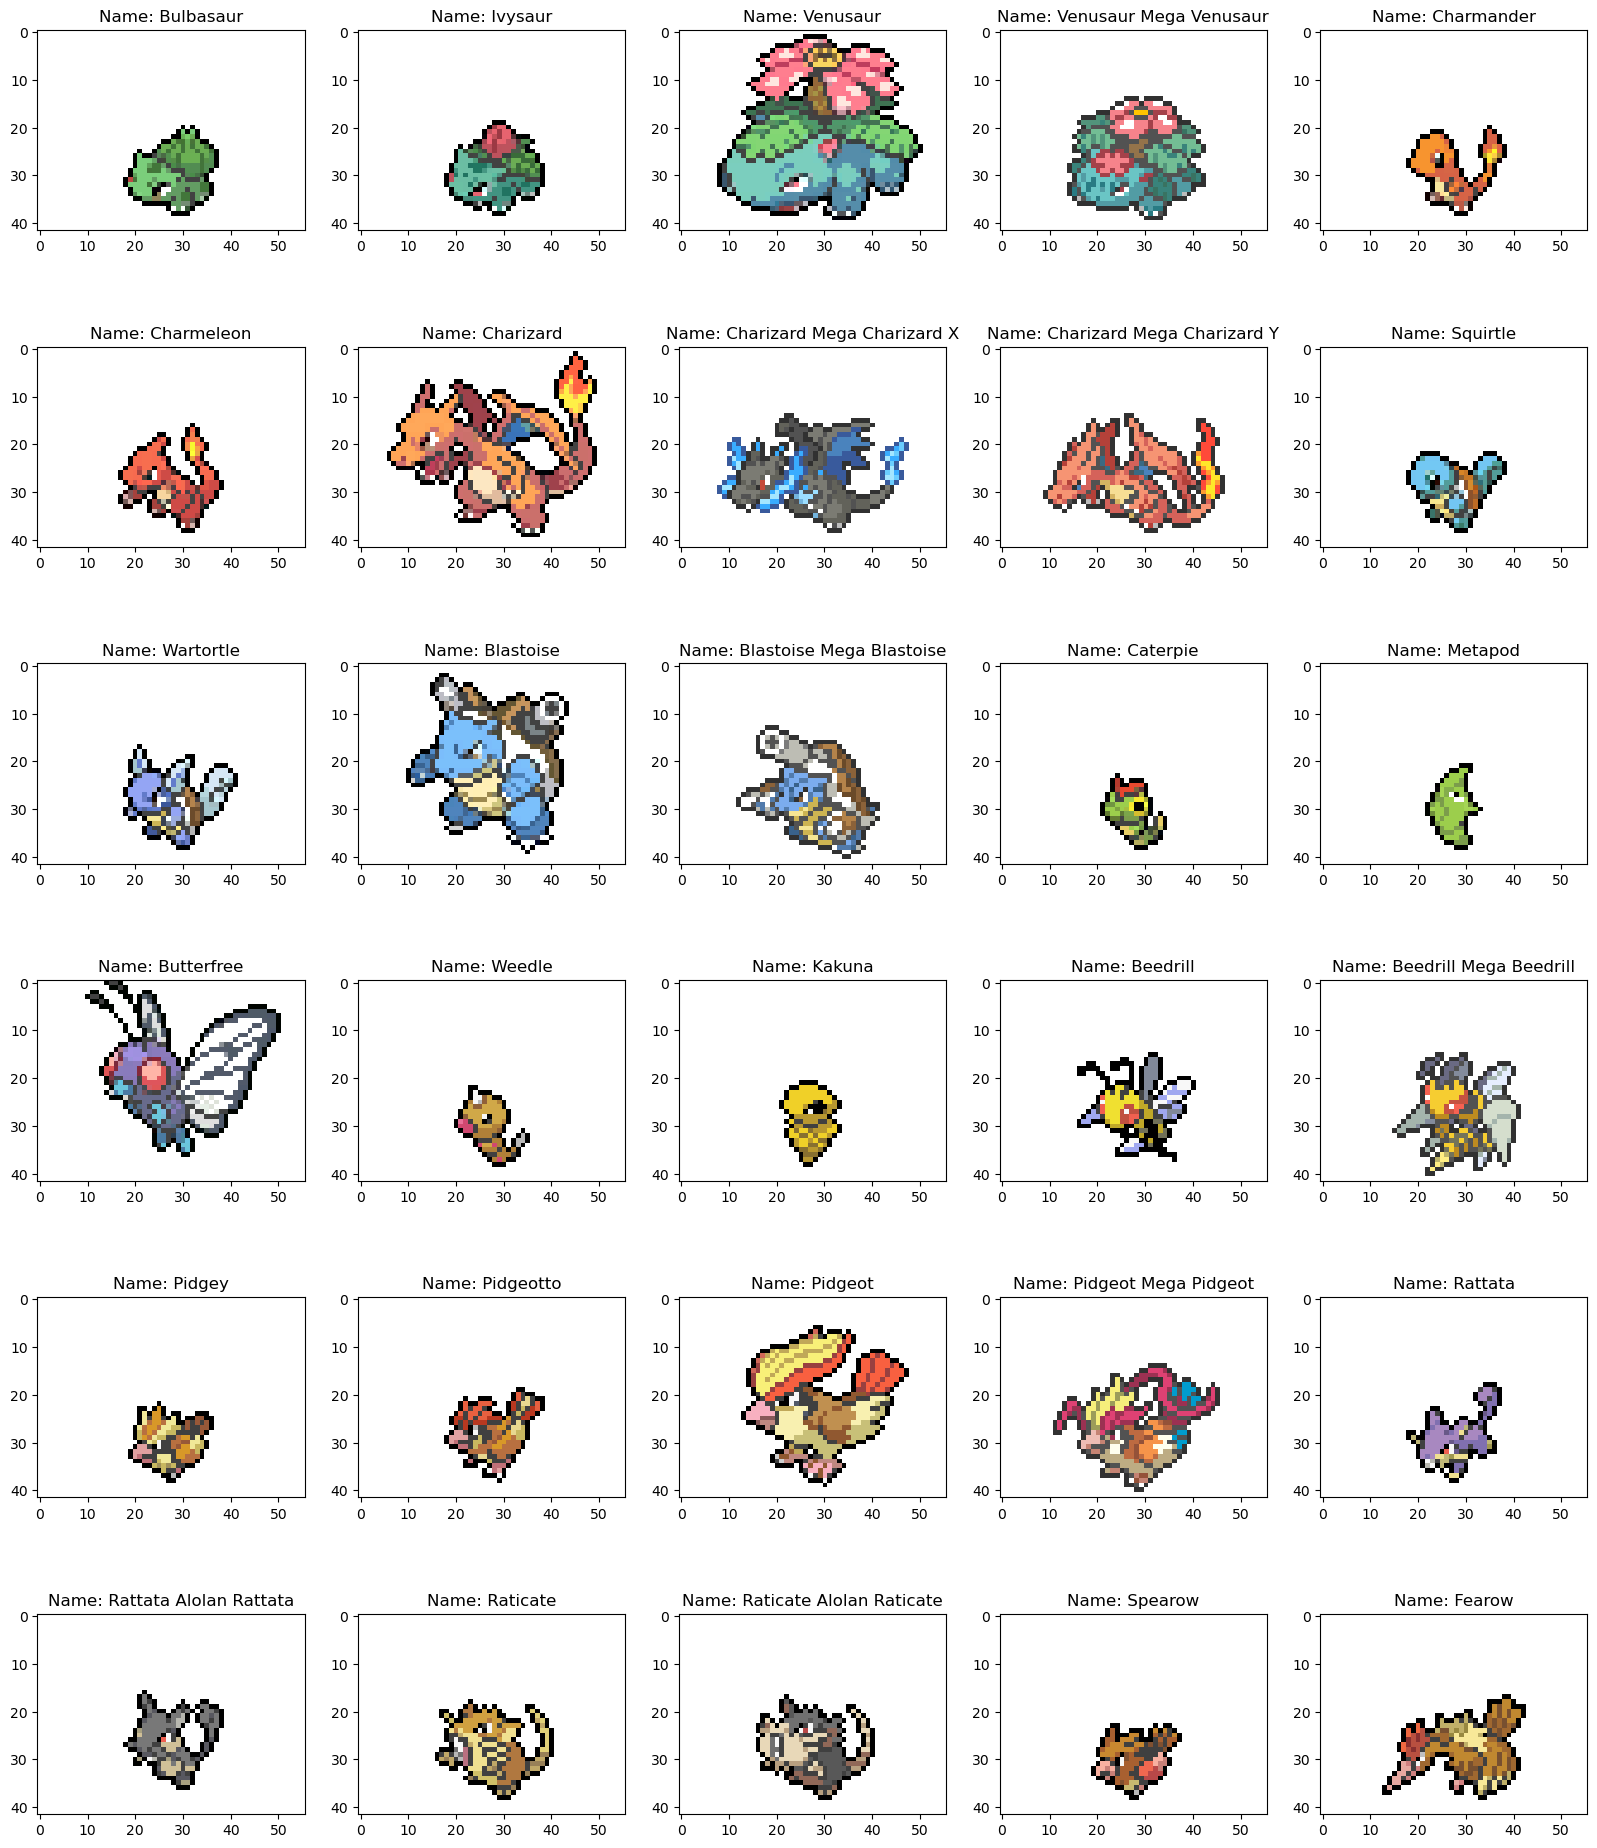

In [9]:
plt.figure(figsize=(20,24))

first_30 = dataset[:30]
for index, url in enumerate(first_30["image_url"].to_list(), start=1):
    plt.subplot(6, 5, index)
    plt.imshow(resize_img(url))
    plt.title(f"Name: {first_30.Names.to_list()[index - 1]}")

Beautiful pokemons, Nice

##### Checking for nan or null data

In [10]:
dataset.isnull().sum()

image_url      0
Id             0
Names          0
Type1          0
Type2        542
Total          0
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
dtype: int64

It can be seen that Only `Type2` column has null/nan values, if we check the actual csv file, it'll be seen that this null values resulted from empty instances<br>
We can check what the `Type2` column mean to decide whether to drop or fill it, and even how to fill it if that is the case

In [11]:
dataset.Type2

0         Poison
1         Poison
2         Poison
3         Poison
4            NaN
          ...   
1189    Fighting
1190      Dragon
1191      Dragon
1192      Dragon
1193     Psychic
Name: Type2, Length: 1194, dtype: object

It is known that pokemons can have one or two, or maybe even more types to describe it's strengths, weaknesses and the type of moves it can learn <br>
Since this is clear, we can see that not every pokemon can have two types, reason some rows are missing in the `Type2` column <br>

We can visualize how many instances of our pokemons have two types and how many have only one type

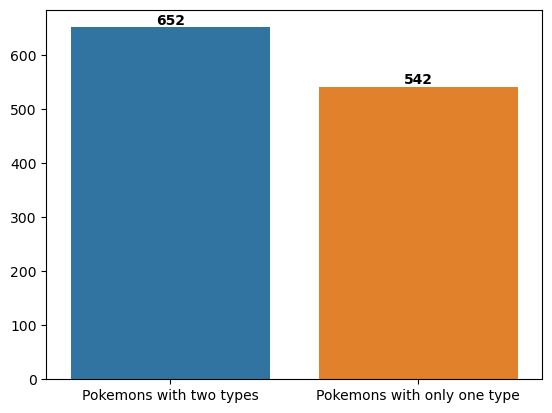

In [12]:
without_2 = dataset[dataset.Type2.isnull()].Type2
with_2 = dataset[~dataset.Type2.isnull()].Type2

x = ["Pokemons with two types", "Pokemons with only one type"]
y=[with_2.value_counts().sum(), len(without_2)]

ax = sns.barplot(x=x, y=y)

for i, v in enumerate(y):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
plt.show()

Since there are so many cases of pokemons with only one type, I will fill in the NaNs with a string `Not Available`

In [13]:
dataset["Type2"].fillna("Not Available", inplace=True)
dataset.head()

,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,Not Available,309,39,52,43,60,50,65


We can actually also visualize the distribution of the `Type1` column, let's get right to it

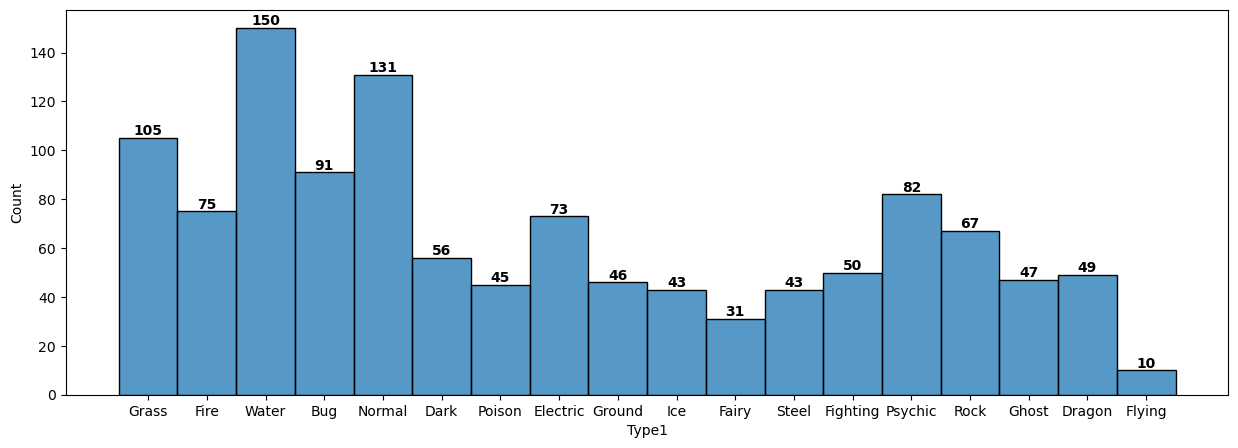

In [14]:
type_1 = dataset.Type1
plt.figure(figsize=(15,5))

ax = sns.histplot(type_1, bins=5)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontweight="bold")
plt.show()

This visualization shows an obviously easy to read and understand distribution of the `Type1` column, we can do the same for the `Type2`

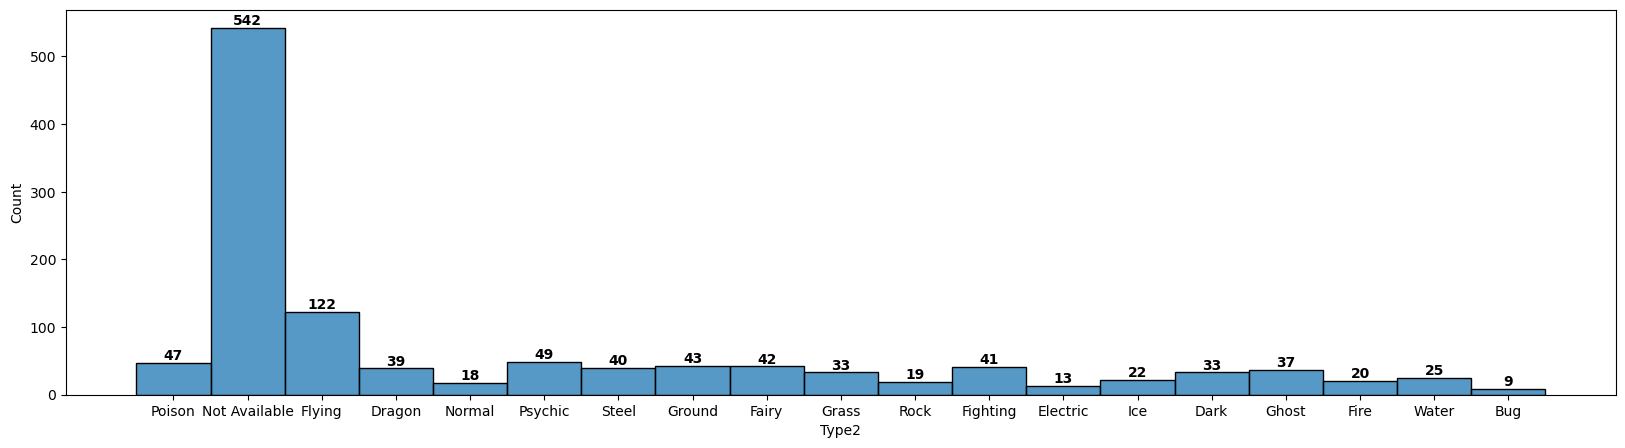

In [15]:
type_2 = dataset.Type2
plt.figure(figsize=(20,5))

ax = sns.histplot(type_2, bins=5)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontweight="bold")
    
plt.show()

It can be seen that there are more cases of `Not Available` for the `Type2` column, than others, it'd have been fatal if we dropped those<br>
It can also be seen that there are some types that are common to both `Type1` and `Type2`

Since there are similar pokemon types in both Type1 and Type2 columns, next step is to merge the two columns and then plot individual counts

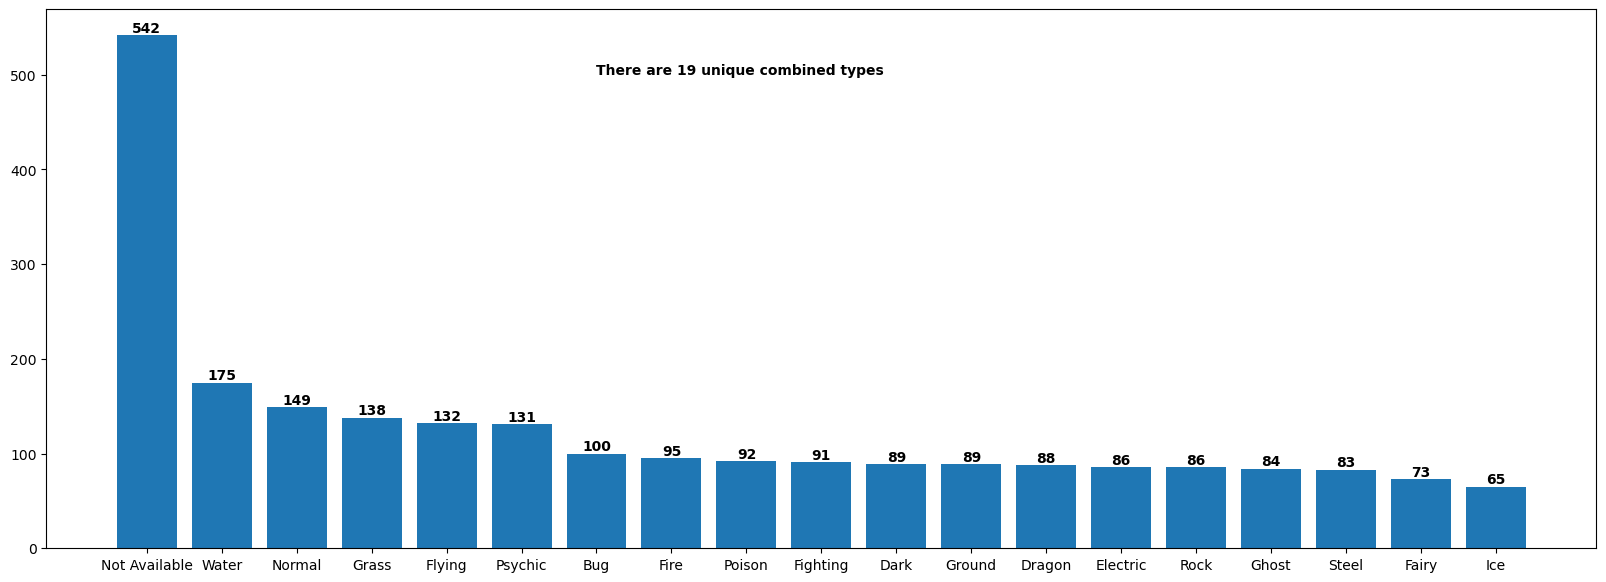

In [34]:
plt.figure(figsize=(20,7))
type1_dict = dataset.Type1.to_list()
type2_dict = dataset.Type2.to_list()
combined = type1_dict + type2_dict

count_dict = Counter(combined)

# print()
count_dict = Counter(dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True)))
plt.bar(count_dict.keys(), count_dict.values())
for x, y in zip(count_dict.keys(), count_dict.values()):
    plt.text(x, y, str(y), ha='center', va='bottom', fontweight="bold")

plt.text(6, 500, f"There are {len(count_dict)} unique combined types", fontweight="bold") #To put the total number text on the plot, starting from the 6th bar, up to point 500 on y axis

plt.show()

What has just been done is combine all types together ignoring repeated types in both types, then getting the count for each of them.<br>
Insights gained

* There are 19 unique combined types of pokemon in the dataset, including the `Not Available` tag created
* The least occuring type in the dataset combined is the `Ice` type
* The most occuring "valid" type is the `Water` type pokemon
*  

Next up is checking the abilities of each pokemon and making sure to check with other previously treated columns, columns to consider are the (`Total`, `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def` and `Speed`) which all happens to be numerical column

#### Brief explanation on the terminologies

* Total: The total attribute refers to the sum of all the base stats of a Pokémon. Base stats are numerical values that determine a Pokémon's overall power and potential.
* HP (Hit Points): HP represents a Pokémon's health or hit points. It indicates how much damage a Pokémon can endure before fainting.
* Attack: The attack attribute represents a Pokémon's physical strength and determines the power of its physical moves.
* Defense: Defense measures a Pokémon's ability to withstand physical attacks from opponents
* Sp. Atk (Special Attack): Sp. Atk is short for Special Attack. It signifies a Pokémon's ability to deal strong damage with special moves like Flamethrower, Thunderbolt, or Psychic. Pokémon with higher Special Attack stats are more effective in using special moves
* Sp. Def (Special Defense): Special Defense refers to a Pokémon's ability to withstand special moves launched by opponents. Pokémon with higher Special Defense stats can better endure attacks like Thunderbolt, Ice Beam, or Shadow Ball
* Speed: Speed represents a Pokémon's agility and determines its priority in battle. Pokémon with higher Speed stats tend to attack first, allowing them to strike before their opponents. Speed is crucial for outspeeding opponents and making strategic moves

Credit: ChatGPT

I think the higher these values are, the better the specific pokemon

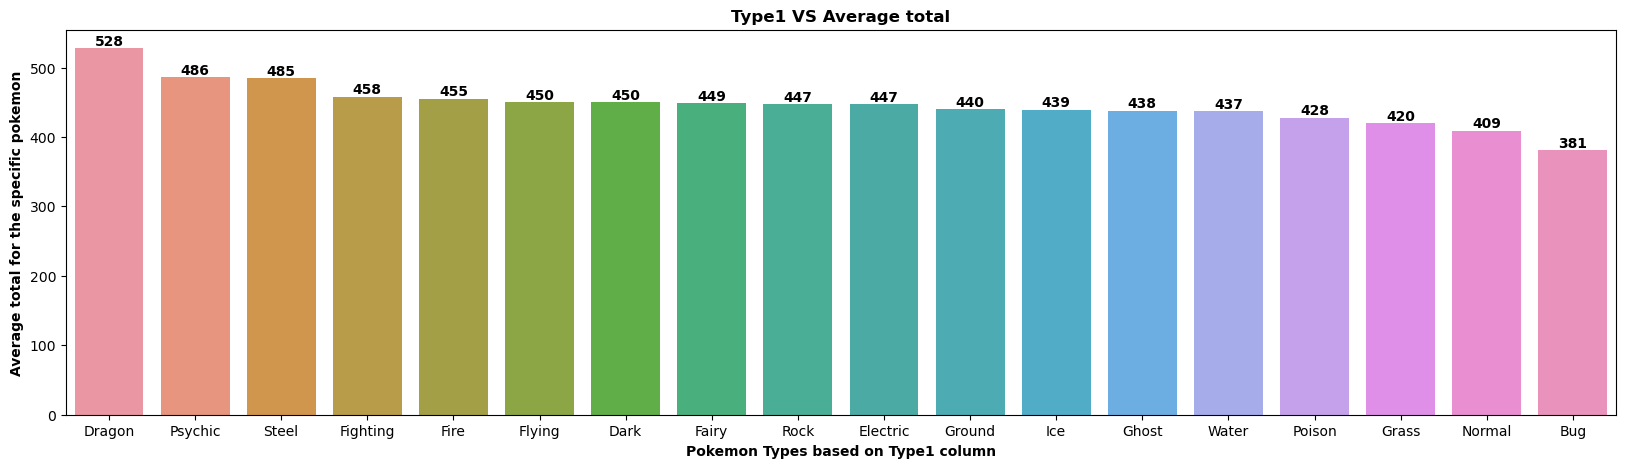

In [16]:
# Creating a visualization to know which type of pokemon is better (Type 1 and total, only)

comp_type = dataset[["Type1", "Total"]] # as in "compare type dataframe"

types = comp_type.Type1.unique()

avg_list = []
for unique_type in types:
    small_df = comp_type[comp_type["Type1"] == unique_type]
    avg_total = int(f"{small_df.Total.mean():.0f}")
    avg_list.append(avg_total)

df_plot = pd.DataFrame({"types" : types, "avg_list" : avg_list}).sort_values(by="avg_list", ascending=False) #Sorting according to the average total in descending order

plt.figure(figsize=(20, 5))

ax = sns.barplot(data=df_plot, x="types", y="avg_list")

plt.xlabel("Pokemon Types based on Type1 column", fontweight="bold")
plt.ylabel("Average total for the specific pokemon", fontweight="bold")
plt.title("Type1 VS Average total", fontweight="bold")

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontweight="bold")

plt.show()

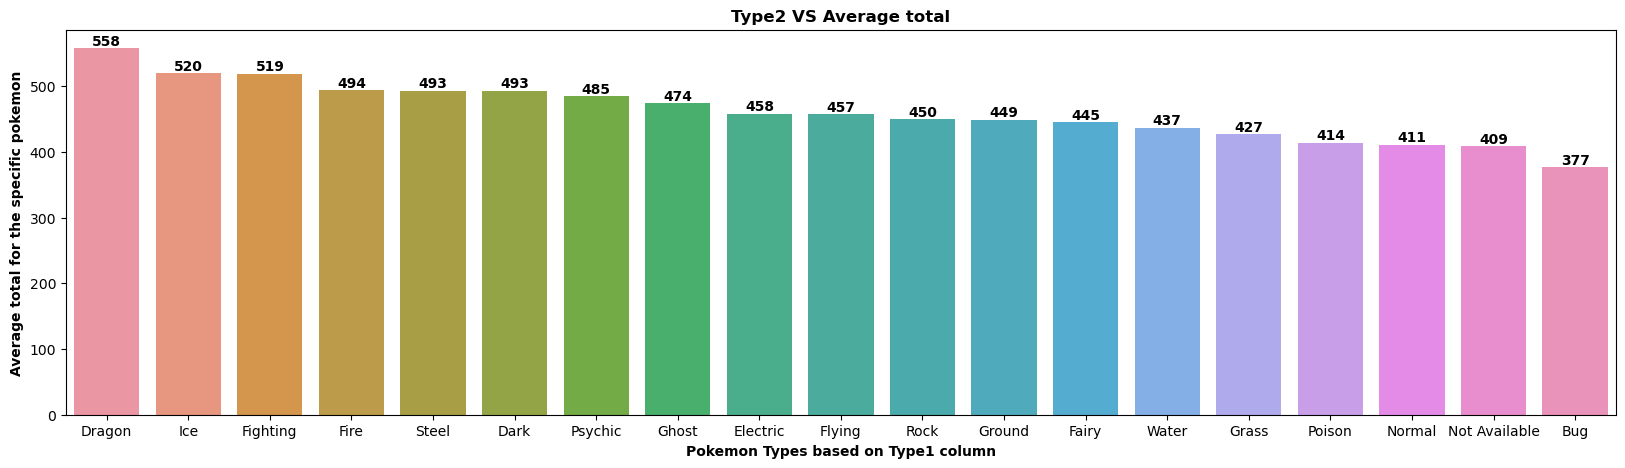

In [17]:
# Creating a visualization to know which type of pokemon is better (Type 2 and total, only)

comp_type = dataset[["Type2", "Total"]] # as in "compare type dataframe"

types = comp_type.Type2.unique()

avg_list = []
for unique_type in types:
    small_df = comp_type[comp_type["Type2"] == unique_type]
    avg_total = int(f"{small_df.Total.mean():.0f}")
    avg_list.append(avg_total)

df_plot = pd.DataFrame({"types" : types, "avg_list" : avg_list}).sort_values(by="avg_list", ascending=False) #Sorting according to the average total in descending order

plt.figure(figsize=(20, 5))

ax = sns.barplot(data=df_plot, x="types", y="avg_list")

plt.xlabel("Pokemon Types based on Type1 column", fontweight="bold")
plt.ylabel("Average total for the specific pokemon", fontweight="bold")
plt.title("Type2 VS Average total", fontweight="bold")

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontweight="bold")

plt.show()

What I did up there was that: 
* I calculated the average total for each unique type of pokemon (Type1 and Type2 seperately)
* Created a dataframe with the unique names and the corresponding average
* Sorted the dataframe in descending order of average
* Created a viz to show a barplot of each average total against it's corresponding type
  
Insights Gained:

* Realized that on Average, `Dragon type` pokemons are slighly better at war than others and that the poorest performing pokemons on average are the `Bug type`
* In both cases, Dragon types are the best and the bug types and the worst on average.
* Also, remember that the `Not Available` tag was used to represent pokemons with only one type, it is evident from the Type2 visualization that all pokemons with two types are performing better than the ones with one type, except for bug type, of course

**🔥🔥🔥 However it is important to note that average does not mean that a `Dragon type` pokemon performed the best in the dataset, the best performing pokemon may be of a different type, but it only means that most `Dragon type` pokemons performed better than most of the other types**

Next up now is to use ydata_profiling to generate automatic report, and explain the possible insights that I gain from there

In [38]:
report = dataset.profile_report()
report.to_file("pokemonreports.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The profile report that has been automatically generated is inluded in an html file in the working directory and is included in the gihub repo [here](./pokemonreports.html)